<a name="top"></a>
<br/>
# Clustering
<br/>

**École Nationale Supérieure des Mines de Nancy**  
  

Lecture: **Deep Learning** by [Parisa Rastin](https://sites.google.com/site/parisarastinresearch/home) and [Christophe Cerisara](https://members.loria.fr/CCerisara/).

Author: [Lucas Lherbier](https://www.linkedin.com/in/lucas-lherbier/).

***
This notebook presents two main clustering algorithms: the `K-means` and the `K-medoids`. There are implemented from scratch, i.e without any machine learning library. For those two machine learning models, some instructions are given at the beginning of the respective sections. 

***

# k-Means

k-means partitioning is a data partitioning method, popular for cluster analysis in data mining.
k-means works on objects represented by vectors. Let $X = \{ x^{1},...,x^{N} \}$ the set of vectors representing the objects $N$ and $K$ clusters. The prototypes (centroids of the clusters) are computed such as to minimize the sum of the square distances (SSD) between each object and its nearest prototype (Gradient Descent) :
$$SSD = \sum_{k=1}^{K}\sum_{x \in C_{k}} \| x - \mu_{k} \| ^{2}$$

## Instructions


* Implement the `K-Means` algorithm.
* Initialize the centroids with the `K-Means++` method.
* Initialize the centroids as follows:
 * Initiate the first centroid at random. Select the other $k-1$ centroids among the $k-1$ closest to the first centroid.
 * Evaluate the quality of clustering.
* Visualize the clusters and their centroids.
* Launch the `K-Means` algorithm several times (initialization random) and evaluate the quality of the results using the **Silhouette** index. 
* Launch the `K-Means` algorithm several times (with the same initialization) with different values of $K$ and evaluate the quality of the results in using the **Silhouette** index.

## Imports



In [1]:
%matplotlib inline

from matplotlib import colors as mcolors
from copy import deepcopy
from random import *

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

all_colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
top_colors = ['blue','green','red','yellow','orange','magenta','black','purple','cyan']

## Useful functions

I will create several functions will be used at a later stage : 
- *distance* : return the distance between 2 points
- *barycenter* : find the barycenter of each group. They do not belong to the initial points
- *plot_iter* : plot the points, groups and center. It will be used at each iteration of the algorithms
- *creation* : given the points and $K$, create labels and groups
- *kmeans* : algorithms of the *k-Means*. Users have to input the type of initialization (see the following paragraph), and if they want to plot the evolution of the groups and the centers

In [2]:
def distance(a,b) : 
    return np.sqrt((a[1]-b[1])**2+(a[0]-b[0])**2)
assert(distance([0,0],[3,4]) == 5.0)
        
def barycenter(center, groupe, points) : 
    for i in range(len(groupe)) :  
        s1, s2 = 0,0
        for u in groupe[i]  : 
            x = points[u]
            s1 += x[0]
            s2 += x[1]
        l = len(groupe[i])
        if l>0 : 
            center[i][0] = s1/l
            center[i][1] = s2/l
    return center


def plot_iter(center,points,groupe,cpt,title):
    X, Y = [],[]
    X_c, Y_c = [],[]
    longbis = 0
    long =  [0]
    legend, legend2 = [0]*K,[0]*K
    for i in range(K) :
        X_c.append(center[i][0])
        Y_c.append(center[i][1])
        for j in groupe[i] : 
            X.append(points[j][0])
            Y.append(points[j][1])
        longbis = len(groupe[i])
        long.append(longbis+long[i])
    plt.xlim(xmin-1,xmax+1)
    plt.ylim(xmin-1,xmax+1)
    if K >9 : 
        color = random.sample(all_colors.keys(), K)
    else : 
        color = top_colors[:K]
    for i in range(K) : 
        plt.title(title + ": step " + str(cpt),
                  fontdict = {'family': 'serif','color':  'darkred', 'weight': 'normal', 'size': 14,})
        legend[i] = plt.scatter(X[long[i]:long[i+1]],Y[long[i]:long[i+1]], c = color[i])
        legend2[i] = 'Group ' + str(i)
        plt.scatter(center[i][0],center[i][1],marker='*',c=color[i],s=300,edgecolors ='black')
    plt.legend(legend,legend2,fontsize=12,loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    return

def creation(points,K) :
    labels = [0]*len(points)
    for i in range(K) : 
        labels[i] = i
    for j in range(K, len(points)) : 
        labels[j] = K-1
    groupe = [0]*K
    for i in range(K-1) : 
        groupe[i] = [i]
    groupe[K-1] = [j for j in range(K-1,len(points))]
    return labels, groupe
    

def kmeans(points,K,f,iteration,title) :   
    labels, groupe = creation(points,K)
    groupe_copie = []
    center = f(points,K)
    cpt = 0
    while groupe!=groupe_copie : 
        cpt +=1
        groupe_copie = deepcopy(groupe)
        for i in range(len(points)) : 
            valeur = 10e+7
            coor_center = 0
            indice_old = labels[i]
            for j in center : 
                if valeur > distance(points[i],j) : 
                    valeur = distance(points[i],j)
                    coor_center = j
            indice = center.index(coor_center)
            labels[i] = indice
            groupe[indice_old].remove(i)
            groupe[indice].append(i)
        center = barycenter(center, groupe, points)
        if iteration : 
            plot_iter(center,points,groupe,cpt,title)
        else : 
            return labels,groupe,center
    return


## k-Means with different initialization

I will create several functions will be used at a later stage : 
- *center_sorted* : initialize the cluster center of each group by taking the first $K$ points
- *center_random* : randomly initialize the cluster center of each group

In [3]:
def center_sorted (x,K) : 
    center = list(x)[:K]
    return center

def center_random (x,K) : 
    center = sample(list(x),K)
    return center

### Random initialization

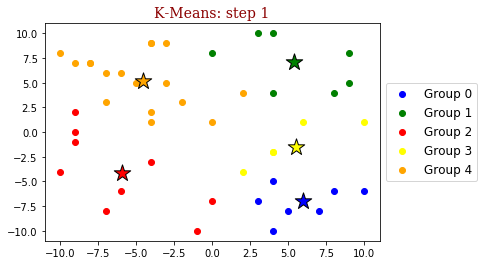

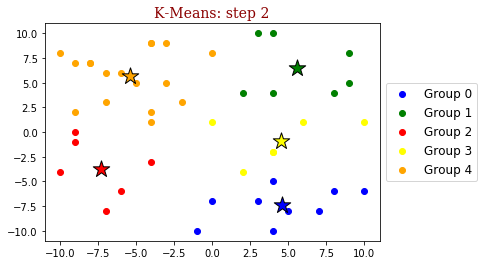

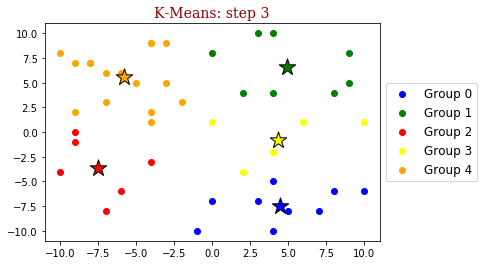

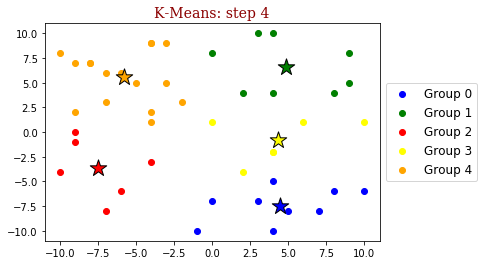

In [4]:
xmin = -10
xmax = - xmin
nb = 50
K = 5
points = [[randint(xmin,xmax),randint(xmin,xmax)] for i in range(nb)]
kmeans(points,K,center_random, True, "K-Means")

### k-Means ++

In order to program the *k-Means ++* algorithm, I will create 3 functions : 
- *proba* : return the distance between $x$ and $c$ divided with the sum of the distances between $x$ and all the $points$. It will be the weight for the following probability distribution
- *probability_distribution* : create the probability distribution where a point $x$ is chosen with probability proportional to *proba*
- *center_plusplus* : return the centers initialized by this method. The goal is to find cluster centers that minimize the sum of squared distances from each data point being clustered to its cluster center


In [5]:
def proba(points,x,c) : 
    res = 0
    for i in points : 
        res+= distance(i,x)**2
    return distance(c,x)**2 / res 

def probability_distribution(liste,proba):
    x = random.random()
    q = proba[0]
    i = 0 
    while x > q : 
        i+= 1
        q+= proba[i]
    return liste[i] 

def center_plusplus(points,K):
    pts  = deepcopy(points)
    x = sample(pts,1)[0]
    pts.remove(x)
    center = [x]
    for u in range(K-1) :
        dist, proba = [], []
        dist_sum = 0
        for i in range(len(pts)) :
            dist.append(distance(pts[i],center[-1])**2)
            dist_sum+= dist[i]
        for i in range(len(pts)) : 
            proba.append(dist[i]/dist_sum)
        center.append(probability_distribution(pts,proba))
        pts.remove(center[-1])
    return center

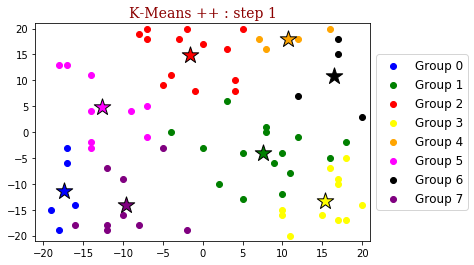

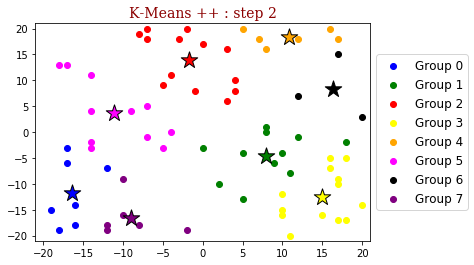

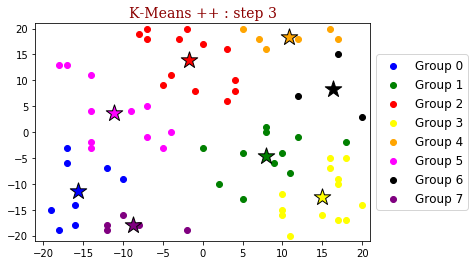

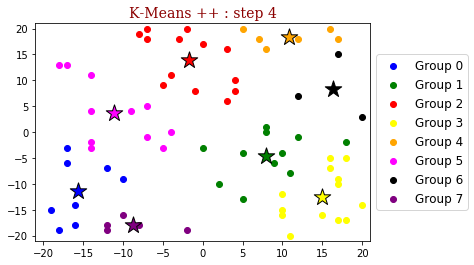

In [6]:
xmin = -20
xmax = - xmin
nb = 70
K = 8
points = [[randint(xmin,xmax),randint(xmin,xmax)] for i in range(nb)]
kmeans(points,K,center_plusplus, True, "K-Means ++ ")

### Nearest neighbors initialization

I will create 3 functions : 
- *ppv* : find the nearest neighbors to x
- *center_ppv* : return the cluster centers initialized by the nearest neighbors

In [7]:
def ppv(x,points,n) :
    voisins  = list(points)
    voisins.remove(x)
    dist = []
    for i in range(len(voisins)) : 
        dist.append([distance(x,voisins[i]),voisins[i]])
    dist.sort()
    return dist[:n]

def center_ppv(points,K) : 
    points2 = list(points)
    x = sample(points2,1)[0]
    neighbors = ppv(x,points2,K)
    center = [x]
    for i in range(1,K) : 
        center.append(neighbors[i-1][1])
    return center

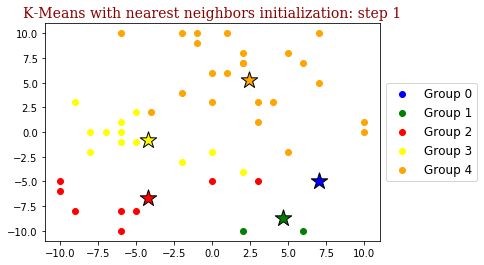

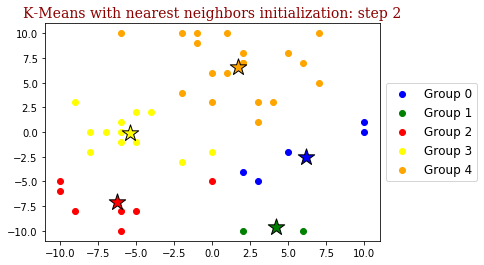

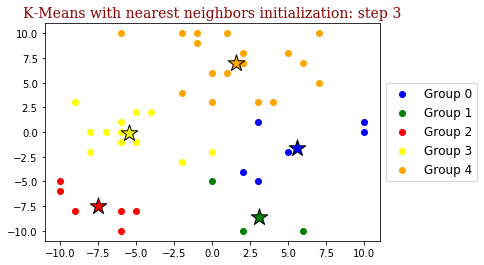

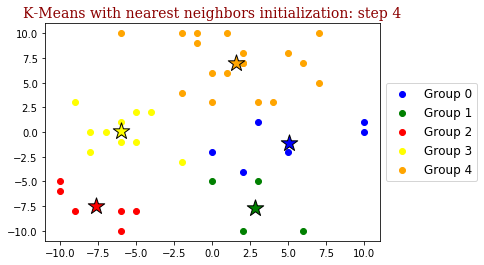

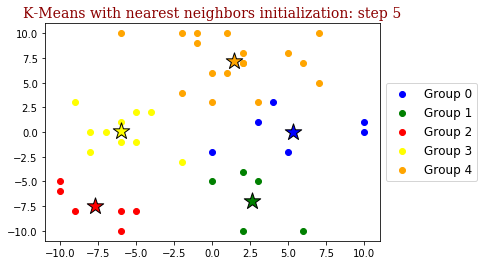

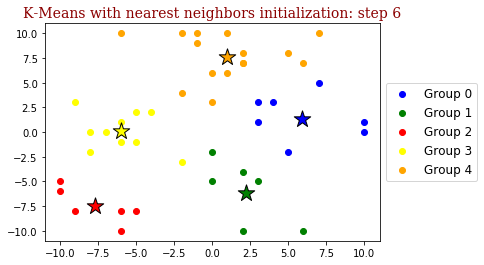

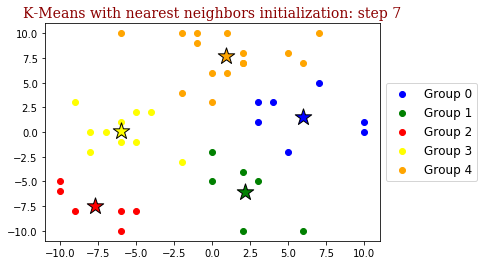

In [8]:
xmin = -10
xmax = - xmin
nb = 50
K = 5
points = [[randint(xmin,xmax),randint(xmin,xmax)] for i in range(nb)]
kmeans(points,K,center_ppv,True, "K-Means with nearest neighbors initialization")

## Evaluation

In order to evaluate the quality of my cluster, I decide to plot the variance because it the loss function that we tried to minimize. The variance is defined such as: 
$$Variance = \sum_{k=1}^{K}\sum_{x \in C_{k}} \| x - \mu_{k} \| ^{2}$$
with $\mu_{k}$ the center of the $k^{th}$ group
### Variance

In [9]:
def variance_groupe(g,points,K,f) :
    var = 0
    pred,groupe,center = g(points,K,f, False,'')
    for k in range(K):
        for x in groupe[k]:
            var += distance(center[k],points[x])     
    return var

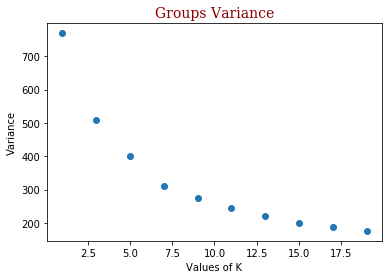

In [10]:
xmin = -10
xmax = - xmin
nb = 100
points = [[randint(xmin,xmax),randint(xmin,xmax)] for i in range(nb)]
res,list_k = [], []

for K in range(1,20,2):
    list_k.append(K)
    res.append(variance_groupe(kmeans,points,K,center_plusplus))
plt.title('Groups Variance', fontdict = {'family': 'serif','color':  'darkred', 'weight': 'normal', 'size': 14,})
plt.xlabel('Values of K')
plt.ylabel('Variance')
plt.scatter(list_k,res)
plt.show()

We can see that the variance decreases with the number of groups. It seems logical because : the more groups they are, the more closer the points. 
An other way of evaluating the quality of the cluster is to use the **Silhouette coefficient**.

### Silhouette value

I will create 3 functions: 
- *dist_intra* : return the mean distance between x and all other data points in the same cluster
- *dist_inter* : return the smallest mean distance of x to all points in any other cluster, of which x is not a member
- *silhouette_i* :

For data point $ i\in C_{i}$ we note $$a(i)=\frac{1}{|C_{i}|-1} \sum _{j \in C_{i},i\neq j}d(i,j)$$

For each data point  $ i\in C_{i}$ we note $$b(i)=\min _{k\neq i}{\frac {1}{|C_{k}|}}\sum _{j\in C_{k}}d(i,j)$$
The **Silhouette value** of one data point $i$ is :  
$$s(i)= \frac {b(i)-a(i)}{\max\{a(i),b(i)\}}$$

Finally, we compute the mean of the Silhouette value for each point.

In [11]:
def dist_intra(x,points,K,f) : 
    pred,groupe,center = kmeans(points,K,f,False,'')
    k = pred[points.index(x)]
    dist = 0
    if len(groupe[k]) == 1 :
        return 0
    else : 
        for i in groupe[k] : 
            dist += distance(x,points[i])
        return dist/(len(groupe[k])-1)

def dist_inter(x,points,K,f) : 
    pred,groupe,center = kmeans(points,K,f,False,'')
    dist_list = [10e+7 for i in range(K)]
    k = pred[points.index(x)]
    for i in range(K):
        if i!=k : 
            dist = 0
            if len(groupe[i])!=0 : 
                for j in groupe[i] : 
                    dist += distance(x,points[j])
                dist_list[i] = dist/len(groupe[i])            
    return min(dist_list)


def silhouette_i(g, points,K,f) :
    indice_silhouette = []
    pred,groupe,center = g(points,K,f,False,'')
    for x in points : 
        k = pred[points.index(x)]
        if len(groupe[k]) > 1: 
            d_in = dist_intra(x,points,K,f)
            d_out = dist_inter(x,points,K,f)
            indice_silhouette.append((d_out-d_in)/max(d_in,d_out))
        else : 
            indice_silhouette.append(0)
    return np.mean(indice_silhouette)

In [12]:
nb = 5
res = np.zeros((3,5))
for i in range(nb):
    res[0,i] = (silhouette_i(kmeans,points,K,center_random))
    res[1,i] = (silhouette_i(kmeans,points,K,center_ppv))
    res[2,i] = (silhouette_i(kmeans,points,K,center_plusplus))

col = ['Test ' + str(i) for i in range(nb)]
data = pd.DataFrame(res, columns = col, index =['center_random','center_ppv','center_plusplus'])
data['Mean'] = [np.mean(res[0,:]),np.mean(res[1,:]),np.mean(res[2,:])]
data

,Test 0,Test 1,Test 2,Test 3,Test 4,Mean
center_random,0.363092,0.355906,0.485913,0.421616,0.445174,0.414340
center_ppv,0.152612,0.233899,0.133946,0.191269,0.284124,0.199170
center_plusplus,0.289018,0.287851,0.155800,0.244876,0.299301,0.255369


In [13]:
nb = 5
res = np.zeros((3,5))
for i in range(nb):
    res[0,i] = (variance_groupe(kmeans,points,K,center_random))
    res[1,i] = (variance_groupe(kmeans,points,K,center_ppv))
    res[2,i] = (variance_groupe(kmeans,points,K,center_plusplus))

col = ['Test ' + str(i) for i in range(nb)]
data = pd.DataFrame(res, columns = col, index =['center_random','center_ppv','center_plusplus'])
data['Mean'] = [np.mean(res[0,:]),np.mean(res[1,:]),np.mean(res[2,:])]
data

,Test 0,Test 1,Test 2,Test 3,Test 4,Mean
center_random,40.307563,32.668432,27.420192,22.733705,31.860069,30.997992
center_ppv,223.922476,356.944954,263.907201,146.124794,131.304322,224.440749
center_plusplus,27.973871,34.338364,41.708913,45.170552,32.146580,36.267656


We note that the results are coherent: the better partitioning is, the more closer to 1 the silhouette index are and the more lower the variance are.


### Silhouette value for the same initialisation

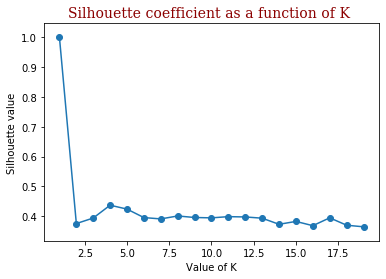

In [14]:
xmin = -20
xmax = - xmin
nb = 200
points = [[randint(xmin,xmax),randint(xmin,xmax)] for i in range(nb)]
res,list_k = [], []
for K in range(1,20):
    list_k.append(K)
    res.append(silhouette_i(kmeans,points,K,center_sorted))
plt.title('Silhouette coefficient as a function of K ', fontdict = {'family': 'serif','color':  'darkred', 'weight': 'normal', 'size': 14,})
plt.xlabel('Value of K')
plt.ylabel('Silhouette value')
plt.scatter(list_k,res)
plt.plot(list_k,res)
plt.show()


We note that the best score is reached with just one group. Then, we see also that the score is quite constant even if it seems to increase with $K$.
***
***

# k-medoid

The concept of `k-medoid` is to find the prototypes (cluster medoids) among the objects o of the data set $𝑂={𝑜_{1},...,𝑜_{N}}$ an to minimize a cost function $J$: sum of the square distances between each object and its nearest medoid: 
    $$ J = \sum^{K}_{k=1} \sum_{𝑖|𝑜^{𝑖} \in 𝐶_{𝑘}} d(𝑜^{i}, \mu^{k})^2$$

$𝐾$ the number of clusters (i.e. the number of medoids)  
$𝑜$ an object in the dataset  
$𝑘$ the medoid for the cluster $𝑘$  
$𝑑(𝑖,𝑗)$ the distance between $𝑖$ and $𝑗$   
$𝐶_{𝑘}$ the set of objects in the cluster $𝑘$ .

## Instructions


* Implement the `K-Medoids` algorithm under Python.
* Initialize the medoids with the `K-means++` method.
* Evaluate the quality of clustering.
* Visualize the clusters and their medoids.
* Run the `K-Medoids` algorithm several times (with the same initialization) and evaluate the quality of the results using the **Silhouette** index.

---
## Useful functions

I will create several functions will be used at a later stage : 
- *dist_center* : return the distance between the cluster center and the other points of the same cluster
- *cost_total* : return the cost of the clustering, i.e. the sum of the *dist_center* for each group
- *ppv_list* : return the list of neighbors of one given point, sorted from the closest to the farthest
- *ppv_medoids* : affect the points to the nearest cluster. For each point, it modifies his label and his group.
- *creation_medoids* :

In [15]:
center_test = [[0,0],[1,1]]
label_test = [1,0,0,1]
points_test = [[1,1],[0,0],[0.5,0.5],[1,1.1]]
group_test = [[1,2],[0,3]]

In [16]:
def dist_center(labels,center,groupe,points) : 
    k = labels[points.index(center)]
    dist = 0
    #if len(groupe[k]) == 1 :
    #    return 0
    #else : 
    for i in groupe[k] : 
        dist += distance(center,points[i])
    return dist/(len(groupe[k]))
assert(dist_center(label_test,center_test[0],group_test, points_test) == 0.3535533905932738)


def cost_total(labels,center,groupe,points) :
    K = len(center)
    cost = 0
    for k in range(K) : 
        cost += dist_center(labels,center[k],groupe,points)
    return cost
assert(dist_center(label_test,center_test[0],group_test, points_test) +
       dist_center(label_test,center_test[1],group_test, points_test)  == 
       cost_total(label_test,center_test,group_test,points_test))

def ppv_list(x,liste): 
    dist = []
    for i in liste : 
        dist.append([distance(x,i),i])
    dist.sort()
    return dist[:1][0][1]
assert(ppv_list([0,0],[[4,2],[1,2],[2,3],[3,4]]) == [1, 2] )

def ppv_medoids(labels,center,groupe,points):
    for i in range(len(points)) : 
        groupe[labels[i]].remove(i) #drop the point to his group
        ppv_j = ppv_list(points[i],center) #find the nearest cluster center
        center_index = center.index(ppv_j) #get the label of the nearest cluster center
        labels[i] = center_index #modifty his label
        if type(groupe[center_index]) == list : #modify his group
            groupe[center_index].append(i)   
        else : 
            groupe[center_index] = list(i)
    return labels, center, groupe
assert(ppv_medoids([1,1,1,1],center_test,[[],[0,3,2,1]],points_test) ==
      (label_test,center_test,group_test))

def creation_medoids(points,K) :
    center = center_random(points,K)    
    labels = [0]*len(points)
    groupe = [0]*K
    labels = [0]*len(points)
    for i in range(K) : 
        labels[i] = i
    for j in range(K, len(points)) : 
        labels[j] = K-1
    groupe = [0]*K
    for i in range(K-1) : 
        groupe[i] = [i]
    groupe[K-1] = [j for j in range(K-1,len(points))]
    return labels, center, groupe


def points_no_center(points,center):
    no_center = []
    for i in points : 
        if i not in center :
            no_center.append(i)
    return no_center
assert(points_no_center(points_test,center_test) == [[0.5, 0.5], [1, 1.1]] )


---
## k-medoids algorithm

This section is mainly inspired by the section *Algorithms* from this [Wikipedia page](https://en.wikipedia.org/wiki/K-medoids).


In [17]:
def kmedoids_iter(points,K,f,iteration,title) : 
    labels, center, groupe = creation_medoids(points,K)
    labels, center, groupe = f(labels, center, groupe, points)
    cost = cost_total(labels,center,groupe,points)
    cost_in = 10e+10
    center_copie, label_copie, groupe_copie = list(center), list(labels), list(groupe)
    cpt = 0
    h = 0
    while cost < cost_in and h < 10 : 
        cost_in = cost
        h += 1
        print('h = ',h, ' and cost = ', cost_in)
        for i in range(len(center)) : 
            not_center = points_no_center(points,center)
            good = []
            for j in not_center : 
                center_copie[i] = j
                label_copie,center_copie, groupe_copie = ppv_medoids(label_copie,center_copie,groupe_copie,points)
                cost_copie = cost_total(label_copie,center_copie,groupe_copie,points) 
                if cost_copie < cost : 
                    good.append([cost_copie,j])
            if len(good)!=0 : 
                cpt +=1
                good.sort()
                cost = good[0][0] 
                center_copie[i] = good[0][1]
                label_copie,center, groupe_copie = ppv_medoids(label_copie,center_copie,groupe_copie,points)
                if iteration : 
                    plot_iter(center_copie,points,groupe_copie,cpt,title)
                    plt.text(x_inter[1] + x_inter[2]/5, y_inter[1] - y_inter[2],text + '\n \nERROR - MSE : \n' + str(round(error,4)), fontsize=12)

                print('Cost : ', cost)
    return labels,groupe,center

In [18]:
def kmedoids(points,K,f,iteration,title) : 
    labels, groupe = creation(points,K)
    center = f(points,K)
    labels, center, groupe = ppv_medoids(labels, center, groupe, points)
    cost = cost_total(labels,center,groupe,points)
    cost_in = 10e+10
    center_copie, label_copie, groupe_copie = list(center), list(labels), list(groupe)
    cpt = 0
    h = 0
    while cost < cost_in and h < 10 : 
        cost_in = cost
        h += 1
        for i in range(len(center)) : 
            not_center = points_no_center(points,center)
            good = []
            for j in not_center : 
                center_copie[i] = j
                label_copie,center_copie, groupe_copie = ppv_medoids(labels,center_copie,groupe,points)
                cost_copie = cost_total(label_copie,center_copie,groupe_copie,points) 
                if cost_copie < cost : 
                    good.append([cost_copie,j])
            if len(good)!=0 : 
                cpt +=1
                good.sort()
                cost = good[0][0] 
                center_copie[i] = good[0][1]
                labels,center, groupe = ppv_medoids(label_copie,center_copie,groupe_copie,points)
                if iteration :               
                    plt.text(xmax*1.15,xmax,'Cost : ' + str(round(cost,4)), fontsize=12)                  
                    plot_iter(center_copie,points,groupe_copie,cpt,title)
    if not iteration : 
        return labels,groupe,center
    return

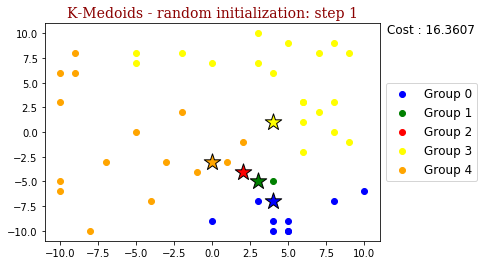

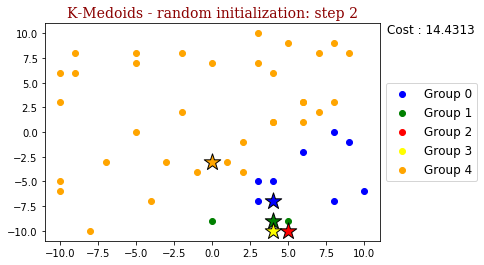

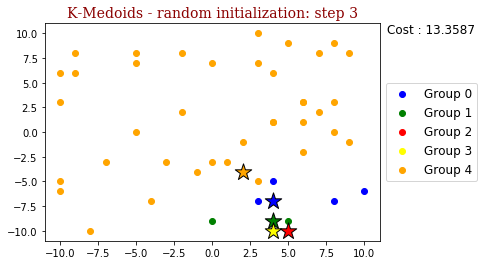

In [19]:
xmin = -10
xmax = - xmin
nb = 50
K = 5
points = [[randint(xmin,xmax),randint(xmin,xmax)] for i in range(nb)]
kmedoids(points,K,center_random,True,'K-Medoids - random initialization')

---
## k-medoids algorithm : random initialization


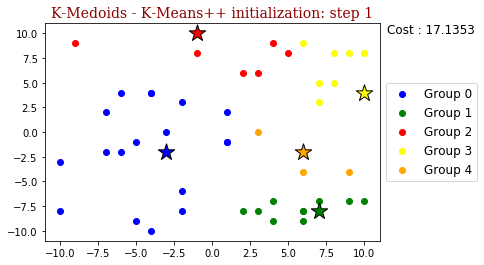

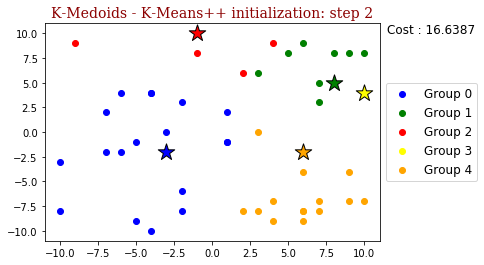

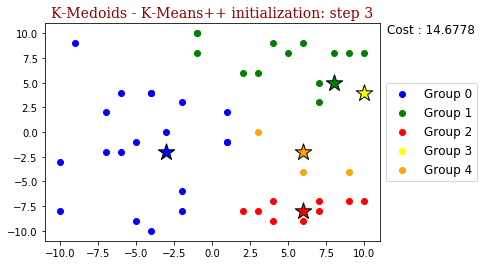

In [20]:
xmin = -10
xmax = - xmin
nb = 50
K = 5
points = [[randint(xmin,xmax),randint(xmin,xmax)] for i in range(nb)]
kmedoids(points,K,center_plusplus,True,'K-Medoids - K-Means++ initialization')

## Evaluation

### Variance

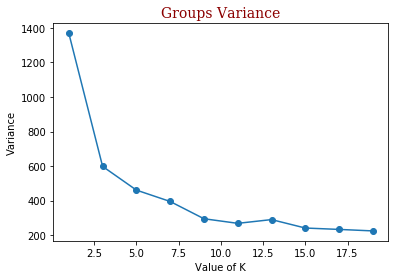

In [21]:
xmin = -10
xmax = - xmin
nb = 100
points = [[randint(xmin,xmax),randint(xmin,xmax)] for i in range(nb)]
res,list_k = [], []

for K in range(1,20,2):
    list_k.append(K)
    res.append(variance_groupe(kmedoids,points,K,center_random))
plt.title('Groups Variance', fontdict = {'family': 'serif','color':  'darkred', 'weight': 'normal', 'size': 14,})
plt.xlabel('Value of K')
plt.ylabel('Variance')
plt.scatter(list_k,res)
plt.plot(list_k,res)
plt.show()

### Silhouette value for the same initialisation

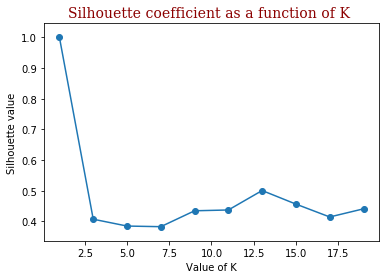

In [22]:
xmin = -10
xmax = - xmin
nb = 100
points = [[randint(xmin,xmax),randint(xmin,xmax)] for i in range(nb)]
res,list_k = [], []

for K in range(1,20,2):
    list_k.append(K)
    res.append(silhouette_i(kmedoids,points,K,center_sorted))
plt.title('Silhouette coefficient as a function of K ', fontdict = {'family': 'serif','color':  'darkred', 'weight': 'normal', 'size': 14,})
plt.xlabel('Value of K')
plt.ylabel('Silhouette value')
plt.scatter(list_k,res)
plt.plot(list_k,res)
plt.show()

***
***

# k-Means vs k-Medoids

* Compare the two methods
* Give some advantages and disadvantages for each algorithm 

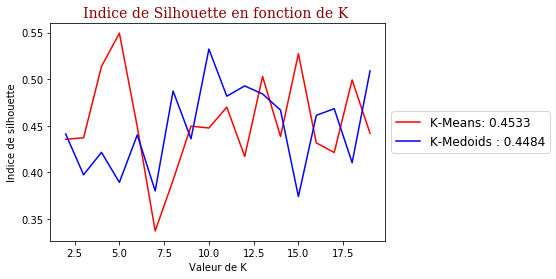

In [23]:
xmin = -10
xmax = - xmin
nb = 100
points = [[randint(xmin,xmax),randint(xmin,xmax)] for i in range(nb)]
res1, res2, list_k = [], [], []
for K in range(2,20):
    list_k.append(K)
    res1.append(silhouette_i(kmeans,points,5,center_random))
    res2.append(silhouette_i(kmedoids,points,5,center_random))

plt.title('Indice de Silhouette en fonction de K ', fontdict = {'family': 'serif','color':  'darkred', 'weight': 'normal', 'size': 14,})
plt.xlabel('Valeur de K')
plt.ylabel('Indice de silhouette')
plt.plot(list_k,res1, 'red')
plt.plot(list_k,res2, 'blue')
plt.legend(['K-Means: ' + str(round(np.mean(res1),4)),'K-Medoids : '+ str(round(np.mean(res2),4))],fontsize=12,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The k-Medoids gives the best result, even if there are really close.

## k-Means

The K-Means has several advantage : 
* it is **easy** to implement k-means and identify unknown groups of data from complex data sets
* it is easy **interpretable** by visualizing the groups
* as we see with the different initialization, this algorithm is **flexible**
* it is **suitable** because it can be used with in large dataset

And the disadvantages are : 
* it **lacks consistency** because it gives varying results on different runs of an algorithm. We saw that the type of initialization yields different clustering results resulting in inconsistency
* the clusters have **not uniform size**
* it is **sensitive** to scale :if we change or rescale the dataset, that will completely change the final results


## k-Medoids

The K-Medoids is more **robust** than k-Means in the presence of noise and outliers. However, for large values of $n$ and $k$, the computation is **costly** and more than the k-Means method.


____

<span style="font-size: 12px"><i>Jupyter Notebook **Clustering.ipynb**<br>
Last modified on Dec 24, 2019<br>
</i></span>